# Gráfico de time varying IRFs en diferentes horizontes de tiempo 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

## Horizontes con shock findex 10k

In [ ]:
# Leer archivo Excel
file = 'Horizon IRFs.xlsx'
df = pd.read_excel(file)

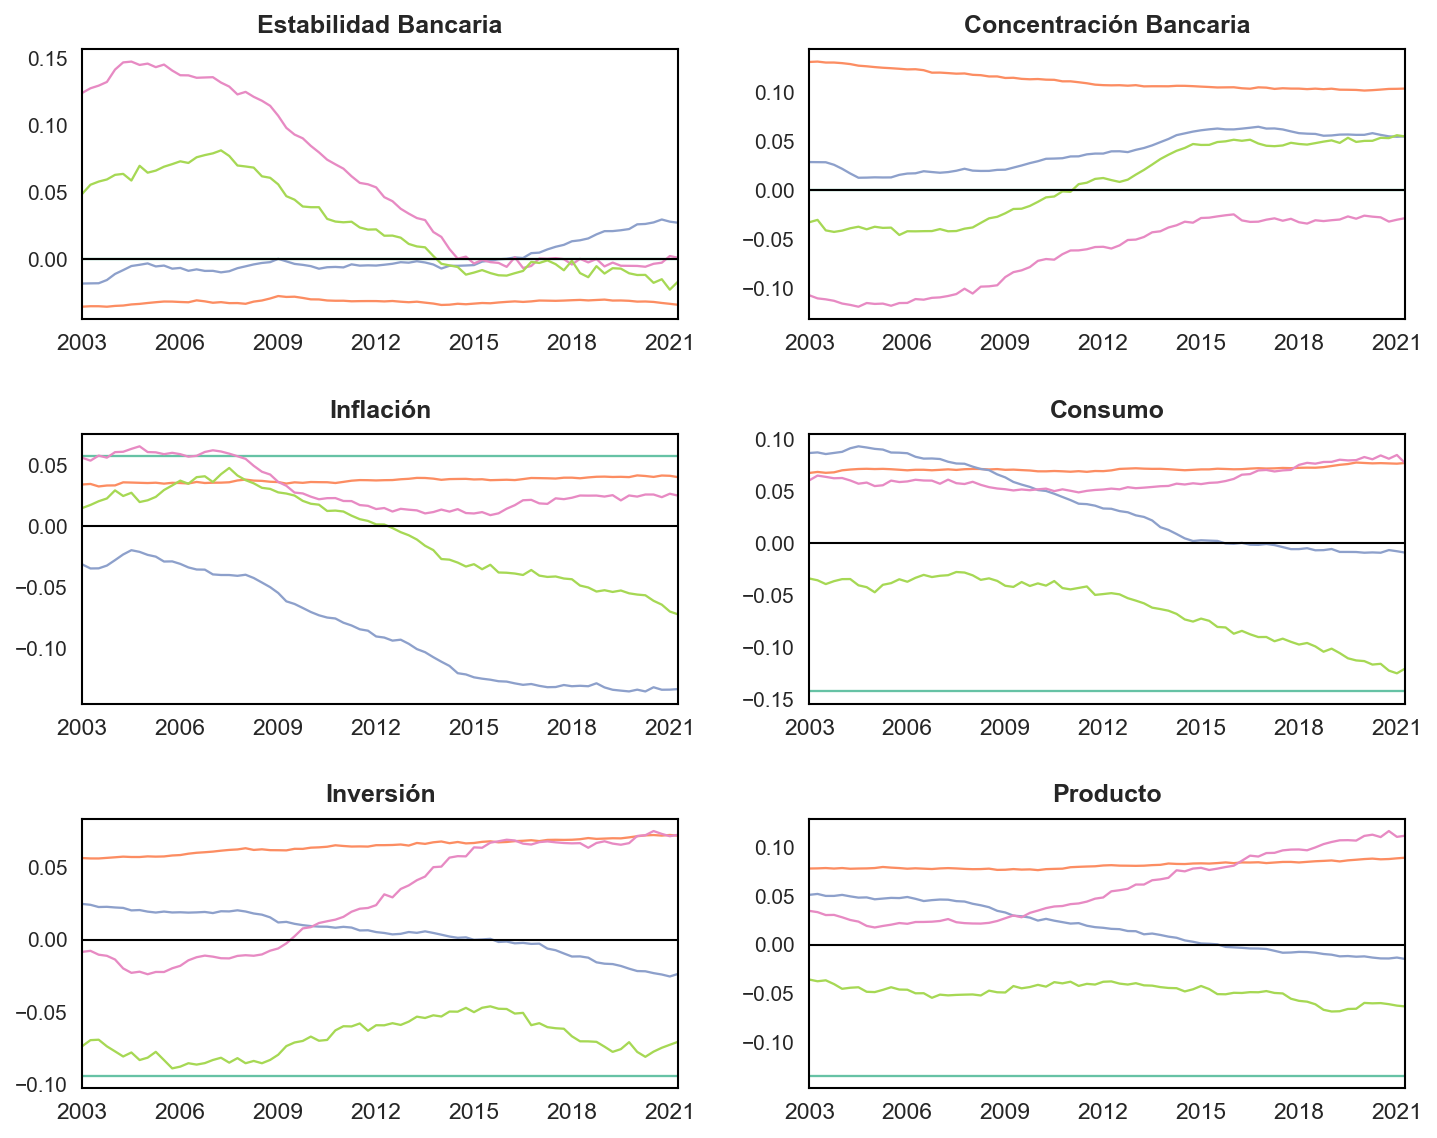

In [36]:
# Estilo general académico y elegante
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 13,
    'axes.edgecolor': 'black',
    'axes.linewidth': 1,
    'grid.color': 'white',
    'axes.grid': False,
    'figure.dpi': 150,
})

# Extraer columnas
variables = df['VARIABLES']
horizons = pd.to_numeric(df['HORIZON'], errors='coerce')

# Filtrar filas válidas
valid_rows = ~horizons.isna()
variables = variables[valid_rows]
horizons = horizons[valid_rows].astype(int)
data = df.loc[valid_rows, df.columns[2:]]

# Convertir etiquetas temporales "2003q2" → datetime (usando primer mes del trimestre)
def quarter_to_date(qstr):
    year, q = qstr.lower().split('q')
    month = {'1': 1, '2': 4, '3': 7, '4': 10}[q]
    return pd.Timestamp(f'{year}-{month:02d}-01')

time_labels = [quarter_to_date(q) for q in data.columns]

# Identificadores únicos
unique_vars = variables.unique()
unique_horizons = sorted(horizons.unique())

# Configuración de subplots
n_rows, n_cols = 3, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8), sharex=False)
axes = axes.flatten()

# Usar la paleta 'Set2' de matplotlib para colores elegantes y suaves
cmap = plt.get_cmap('Set2')
colors = [cmap(i) for i in range(len(unique_horizons))]

# Títulos personalizados para los subgráficos
titulos = [
    'Estabilidad Bancaria',
    'Concentración Bancaria',
    'Inflación',
    'Consumo',
    'Inversión',
    'Producto'
]

# Graficar cada variable
for idx, var in enumerate(unique_vars):
    ax = axes[idx]
    
    for h_idx, h in enumerate(unique_horizons):
        mask = (variables == var) & (horizons == h)
        irf_series = data[mask].values.flatten()
        ax.plot(time_labels, irf_series, color=colors[h_idx], linewidth=1.1)  # Línea más delgada
    
    ax.set_title(titulos[idx], fontsize=12, fontweight='bold', pad=8)
    ax.axhline(0, color='black', linewidth=1)
    ax.tick_params(axis='x', labelrotation=0, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlim([pd.to_datetime(time_labels[0]), pd.to_datetime(time_labels[-1])])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Mostrar etiquetas del eje x cada 16 observaciones
    ax.set_xticks(time_labels[::12])
    ax.tick_params(axis='x', labelsize=11)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Eliminar subplots vacíos
for j in range(len(unique_vars), n_rows * n_cols):
    fig.delaxes(axes[j])

# Ajustar diseño
plt.tight_layout(pad=2.0)
plt.show()